### import everything

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_moons

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

### 製作2維資料

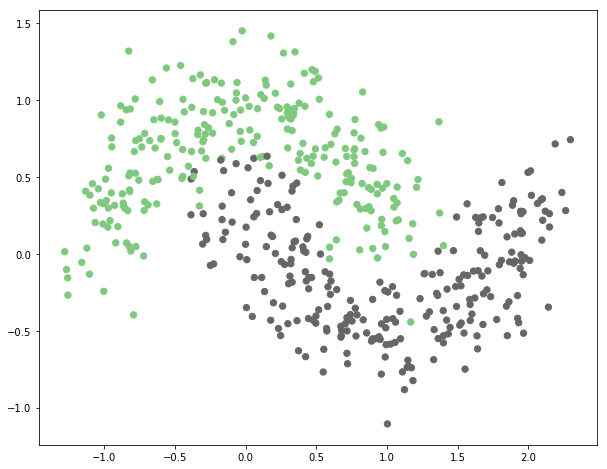

In [2]:
data, label = make_moons(n_samples=500, noise=0.2, random_state=0)
label = label.reshape(500, 1)

plt.scatter(data[:,0], data[:,1], s=40, c=label, cmap=plt.cm.Accent)

### Multilayer neural network

In [3]:
sess = tf.InteractiveSession()

In [12]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [13]:
# Network Parameters
n_hidden_1 = 50
n_hidden_2 = 50
n_input = 2
n_output = 1

In [14]:
# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])

### 將weights與biases以字典的形式儲存

In [15]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1], dtype=tf.float32)),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], dtype=tf.float32)),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_output]), dtype=tf.float32)
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1]), dtype=tf.float32),
    'b2': tf.Variable(tf.random_normal([n_hidden_2]), dtype=tf.float32),
    'out': tf.Variable(tf.random_normal([n_output]), dtype=tf.float32)
}

### 建構模型與optimizer

In [16]:
# Construct model
predict = multilayer_perceptron(x, weights, biases)

# Define cost and optimizer
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=predict, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

### 疊代10000次

In [17]:
sess.run(tf.global_variables_initializer())

In [18]:
for epoch in range(10000):
    _, c = sess.run([optimizer, cost], feed_dict={x: data, y: label})
    if epoch % 1000 == 0:
        print("epoch:{}, cost:{}".format(epoch, c))

epoch:0, cost:7.7524871826171875
epoch:1000, cost:0.06563770025968552
epoch:2000, cost:0.058800261467695236
epoch:3000, cost:0.05609801411628723
epoch:4000, cost:0.054399967193603516
epoch:5000, cost:0.053029563277959824
epoch:6000, cost:0.0518752858042717
epoch:7000, cost:0.050865739583969116
epoch:8000, cost:0.049863334745168686
epoch:9000, cost:0.04889710247516632


### 畫出結果

In [19]:
def sigmoid(x): 
    return 1.0 / (1.0 + np.exp(-x)) 

In [20]:
def plot_decision_boundary(X, y, model):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    pred_every_point = np.c_[xx.ravel(), yy.ravel()]
    feed_dict = {x: pred_every_point}
    Z = sess.run(model, feed_dict)
    Z = sigmoid(Z)
    Z[Z>=0.5] = 1
    Z[Z<0.5] = 0
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], s=40,  c=y, cmap=plt.cm.BuGn)

In [21]:
feed_dict = {x: data}
classification = sess.run(predict, feed_dict)
classification = sigmoid(classification)
classification[classification>=0.5] = 1
classification[classification<0.5] = 0

print('Accuary:', float(sum(label == classification)[0])  / label.shape[0])

Accuary: 0.978


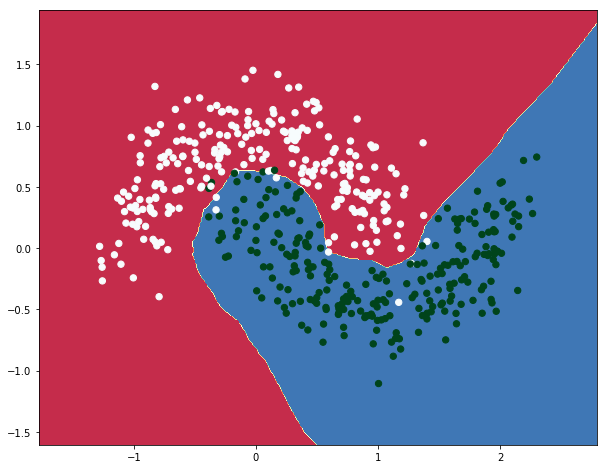

In [22]:
plot_decision_boundary(data, label, predict)

# Your turn!

* 隱藏層的層數是否影響收斂步數?
* 隱藏層的層數是否影響訓練時間?
* 隱藏層的神經元數量是否影響收斂步數?
* 隱藏層的神經元數量是否影響訓練時間?